# Air Quality: - Explore the Data

In this notebook, i explore the Bogotá air quality data. The dataset came from the Bogotá Air Quality Monitoring Network [Red de Monitoreo de Calidad del Aire de Bogotá (RMCAB)](http://201.245.192.252:81/home/map).

Steps:

1. Import Python packages
2. Load the data
3. Count null values
4. Plot histograms of different pollutants
5. Make boxplots of pollutants at each measurement station
6. Investigate scatterplots of different pollutants and look for correlation
7. Generate simultaneous scatterplots and histograms across all pollutants
8. Construct a correlation matrix to quantitatively look for correlation
9. Look at measurements over time for different pollutants at different stations
10. Visualize the data in a map representation

## 1. Import Python packages

In [13]:
import sys
import warnings
from datetime import datetime

import pandas as pd

# Add the src directory to Python's path
sys.path.append("../src")

# # Ignore FutureWarning messages to avoid clutter in the output
# warnings.filterwarnings('ignore', category=FutureWarning)

from data.fix_dates import fix_dates
from visualization import visualize

print('All packages imported successfully!')

All packages imported successfully!


## 2. Load the data

In [2]:
# Read in the data
raw_data = pd.read_csv('../data/raw/RMCAB_air_quality_sensor_data.csv')

# Modify the DateTime column format
raw_data['DateTime'] = pd.to_datetime(fix_dates(raw_data, 'DateTime'), dayfirst=True)

# Rename "OZONO" column from Spanish to English
raw_data = raw_data.rename(columns={'OZONO': 'OZONE'})

# List all of the pollutants that you will be working with
pollutants_list = ['PM2.5', 'PM10',  'NO', 'NO2', 'NOX', 'CO', 'OZONE']

# Print out the number of lines in the dataframe
print(f"The dataset contains {len(raw_data)} entries")

# Print out the first few lines in the dataframe
raw_data.head(5)

The dataset contains 166440 entries


,PM10,PM2.5,NO,NO2,NOX,CO,OZONE,Station,DateTime
0,56.6,32.7,7.504,15.962,23.493,0.44924,2.431,USM,2021-01-01 00:00:00
1,59.3,39.3,16.560,17.866,34.426,0.69832,1.121,USM,2021-01-01 01:00:00
2,96.4,70.8,22.989,17.802,40.791,0.88243,1.172,USM,2021-01-01 02:00:00
3,108.3,81.0,3.704,9.886,13.591,0.29549,6.565,USM,2021-01-01 03:00:00
4,87.7,56.1,2.098,9.272,11.371,0.16621,9.513,USM,2021-01-01 04:00:00


## 3. Count null values

In [3]:
# Print out a count of null values for each column in the dataset
raw_data.isnull().sum()

PM10        20014
PM2.5       15312
NO          27664
NO2         27662
NOX         27668
CO          31238
OZONE       32132
Station         0
DateTime        0
dtype: int64

## 4. Plot histograms of different pollutants

Use the pulldown menus to select different pollutants and different sensor stations. Have a look at how the distribution looks for a particular pollutant across different sensor stations, as well as the distributions of different pollutants. 

In [4]:
# Define a number of bins\
number_of_bins=64

# Generate histograms
visualize.create_histogram_plot(raw_data, number_of_bins)

interactive(children=(Dropdown(description='Station', options=('USM', 'BOL', 'SUB', 'TUN', 'LFR', 'PTE', 'MAM'…

## 5. Make box plots of pollutants across all sensor stations

Use the pulldown menus to select different pollutants. 

In [8]:
# Generate boxplots of pollutant values for each sensor station
visualize.create_boxplot(raw_data)

interactive(children=(Dropdown(description='Pollutant', options=('PM2.5', 'PM10', 'NO', 'NO2', 'NOX', 'CO', 'O…

## 6. Investigate scatter plots of different pollutants and look for correlation

Use the pulldown menus to investigate the relationship between different pollutants.The colors on the plot show the concentration of the points. Areas of the plot that appear from blue to green, to red and orange show an increasing density of points. 

In [6]:
# Generate scatterplots of different pollutants against one another
# Different colors show various densities of points on the plot
visualize.create_scatterplot(raw_data)

interactive(children=(Dropdown(description='X-Axis', options=('PM2.5', 'PM10', 'NO', 'NO2', 'NOX', 'CO', 'OZON…

## 7. Generate simultaneous scatterplots and histograms across all pollutants

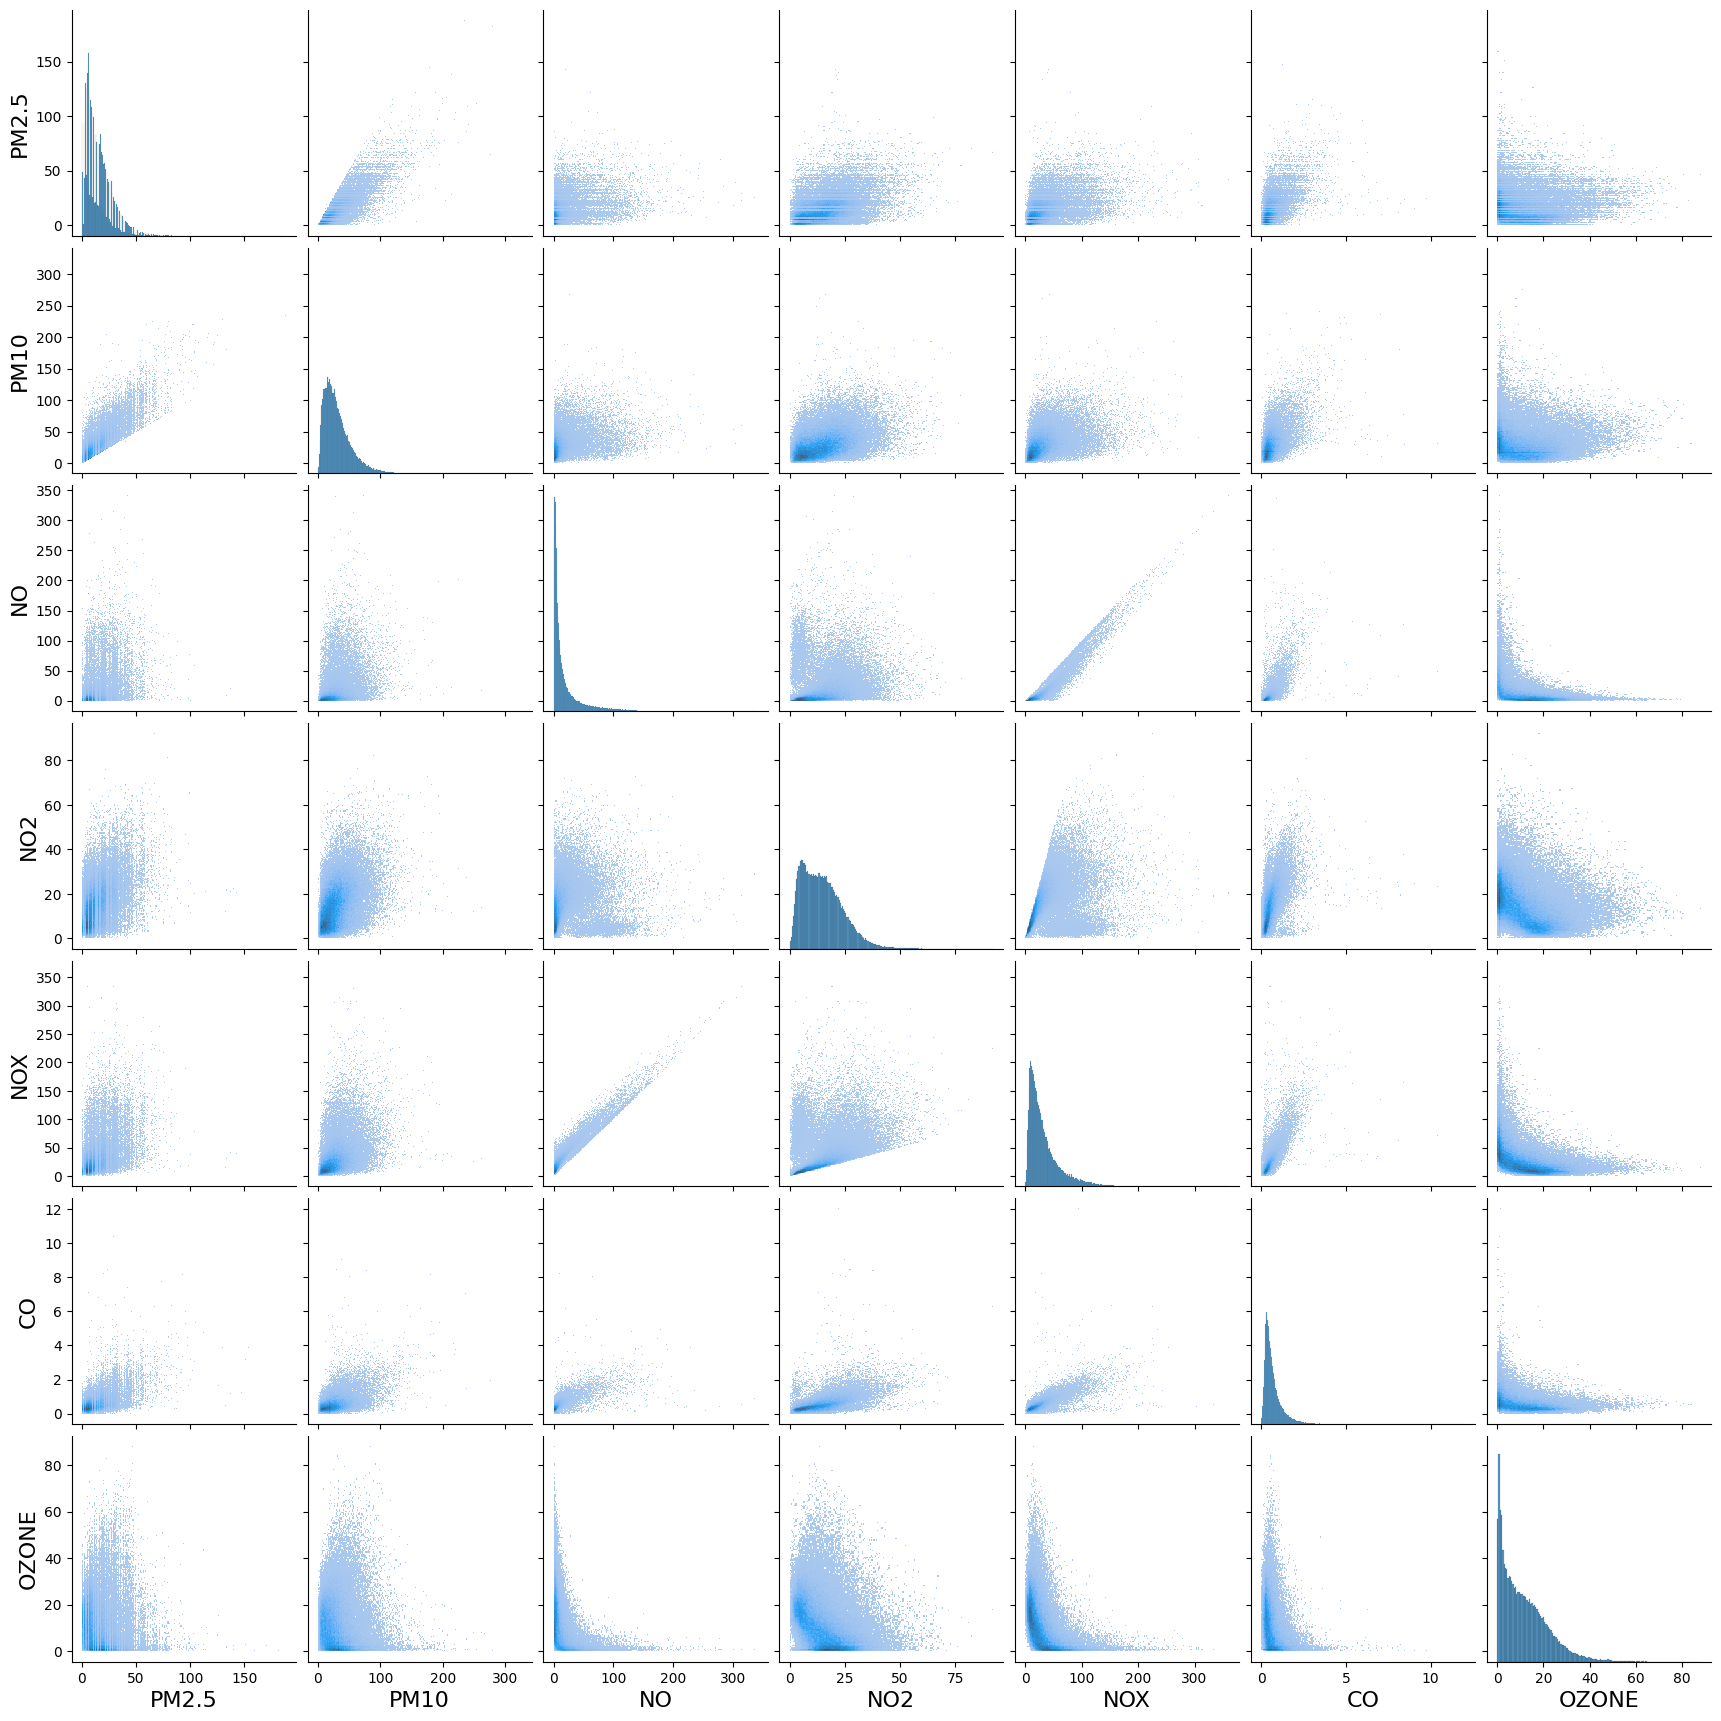

In [7]:
# generate a grid of histograms and scatterplots of your data
visualize.plot_pairplot(raw_data, pollutants_list)

## 8. Construct a correlation matrix to quantitatively look for correlation

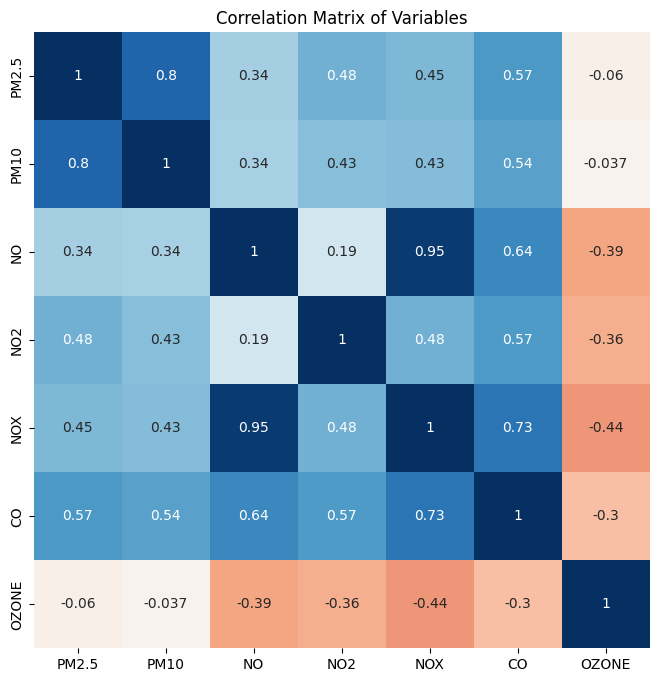

In [10]:
# generate a correlation matrix
visualize.create_correlation_matrix(raw_data, pollutants_list)

## 9. Look at measurements over time for different pollutants at different stations

Use the pulldown menus to choose different stations and pollutants. You can also use the sliders to zoom in or out on a particular range of dates. It's also possible to edit the `start_date` and `end_date` values and run the code cell again to start with a different date range. Have a look across different pollutants and different stations.

In [11]:
# define the date range to show in the plot
start_date = datetime(2021, 1, 1)
end_date = datetime(2021, 1, 31)
# generate a time series plot of pollutant data for a paricular station
visualize.create_time_series_plot(raw_data, start_date, end_date)

interactive(children=(Dropdown(description='Station', options=('USM', 'BOL', 'SUB', 'TUN', 'LFR', 'PTE', 'MAM'…

## 10. Visualize the data in a map representation

Run the next cell to generate a map based on the PM2.5 measurements across the city of Bogotá. Here you'll see a circle on the map at each sensor station location. Each circle is colored based on the annual average of PM2.5 measured at that location. You can click on each sensor location to see a plot of the hourly average (averaged over the whole year for each hour of the day) as well as the long-term average value and the recommended level of PM2.5. If you change where it says `hour_of_day` to `day_of_week` in the code, you'll see the daily average by day of the week in the plot when you click on each station. You can also change the pollutant to display in the map and the charts by changing the `y_variable` below. Have a look at the distribution of long-term averages by hour of day and day of the week at each station and see what you find!


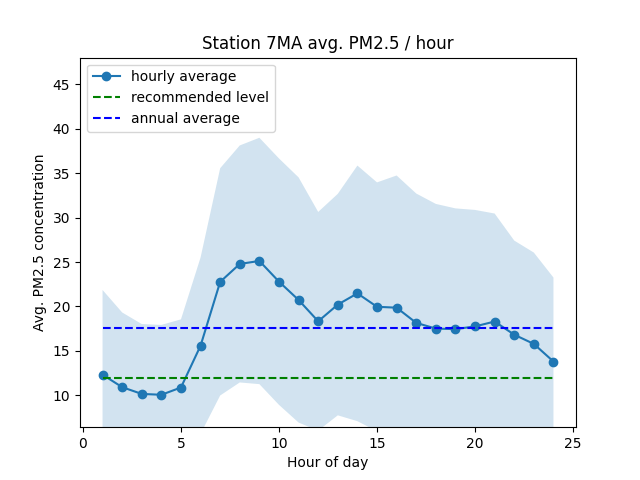
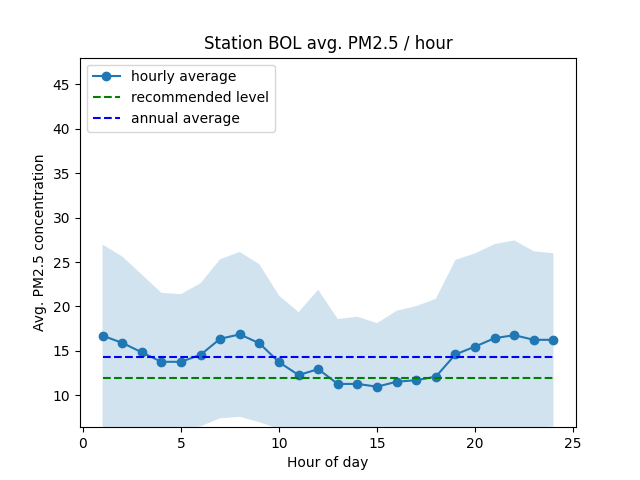
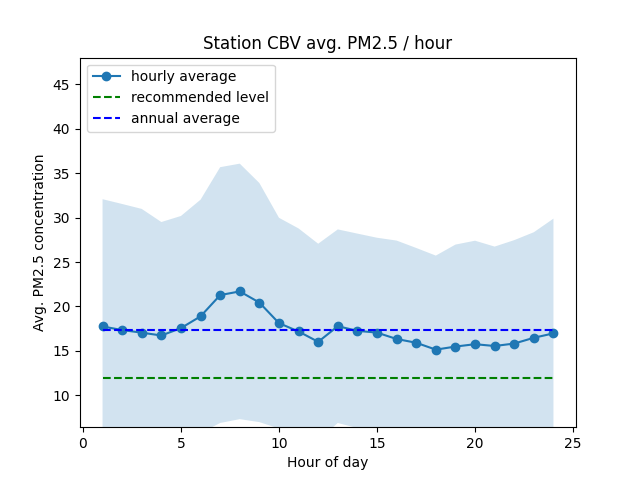
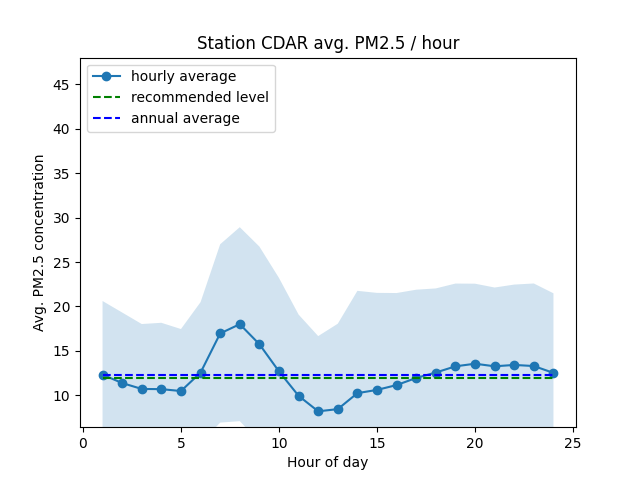
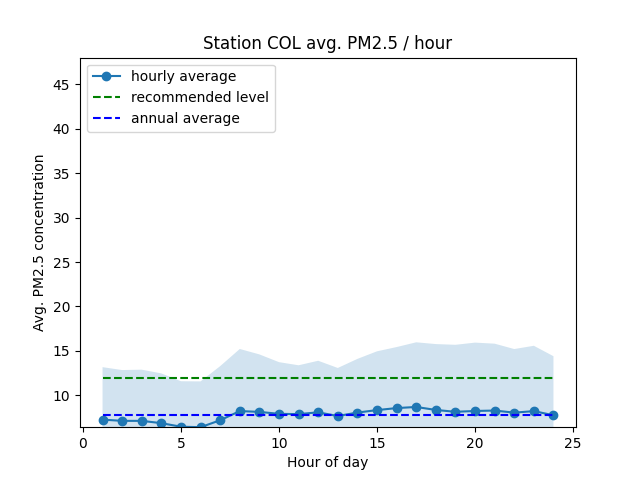
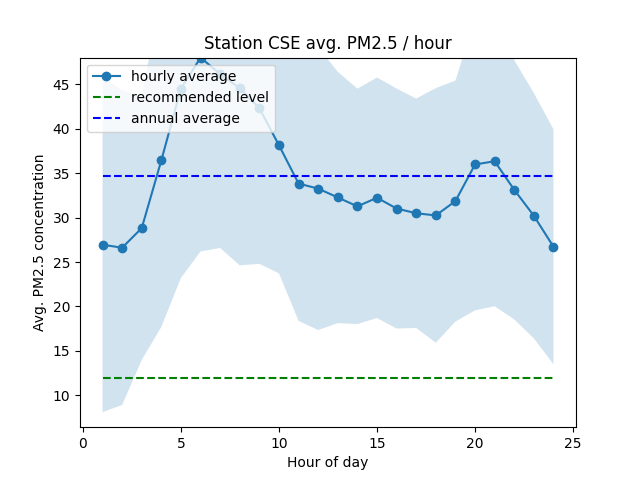
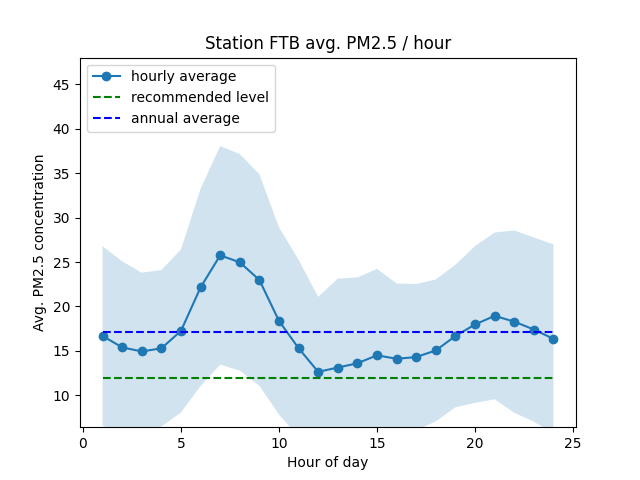
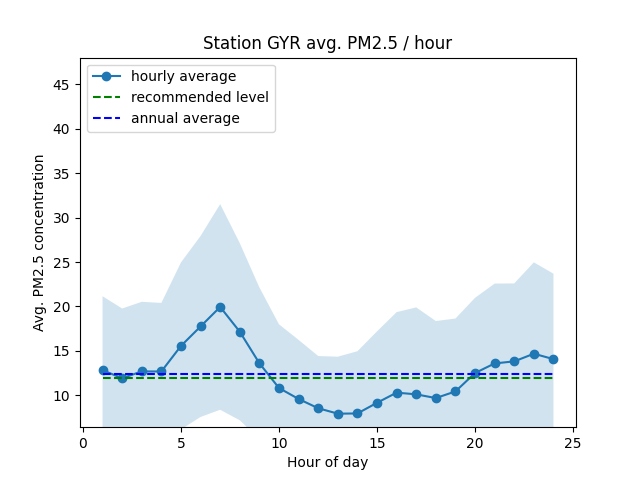
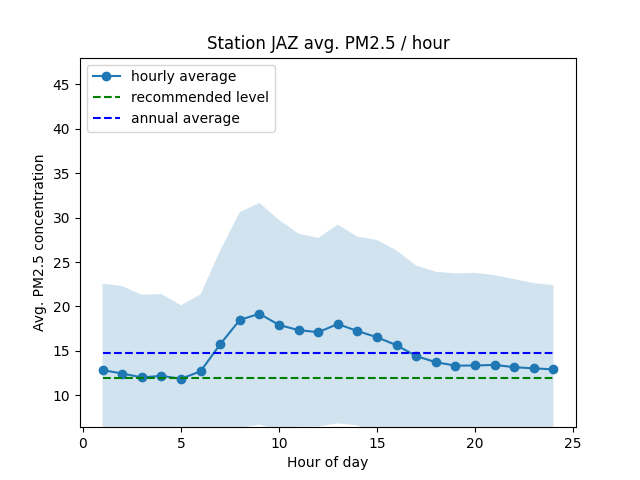
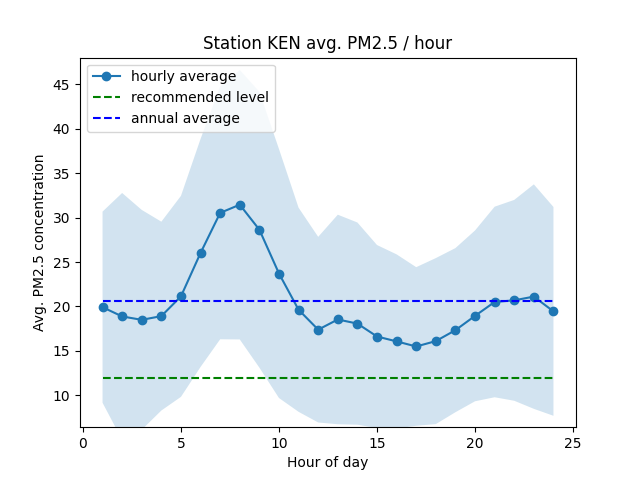
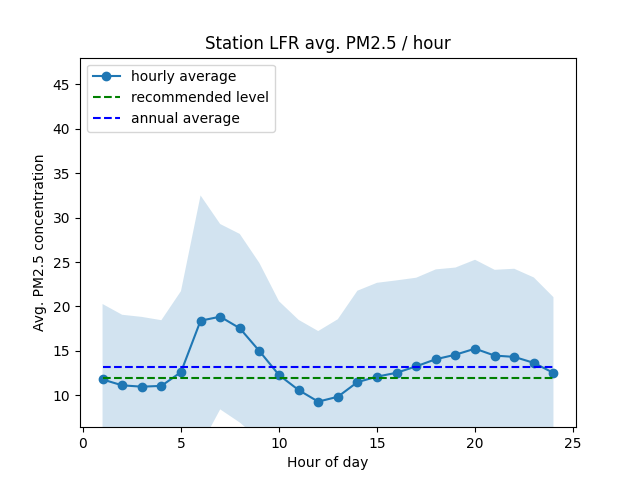
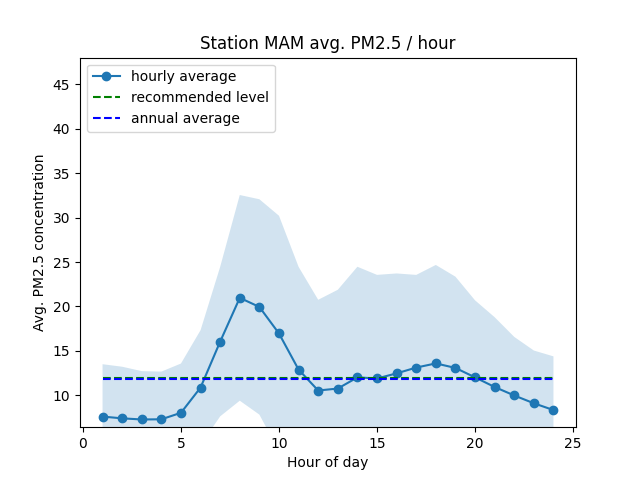
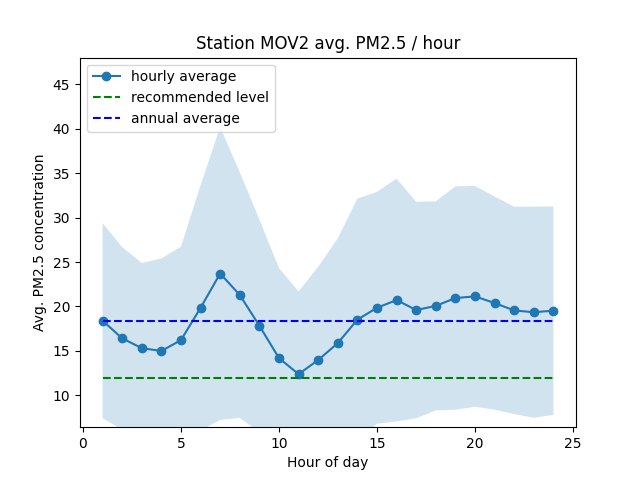
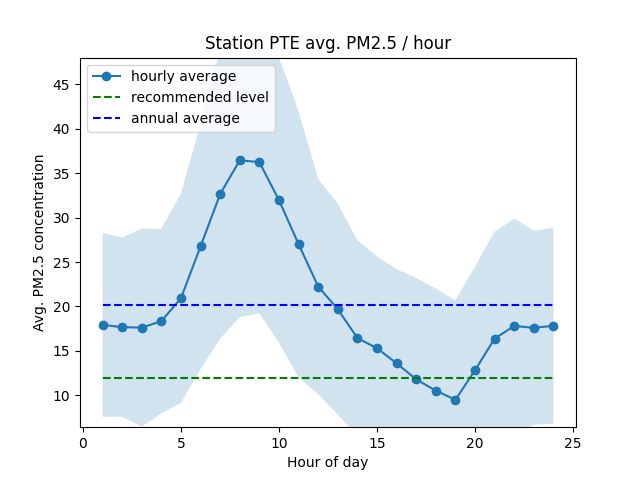
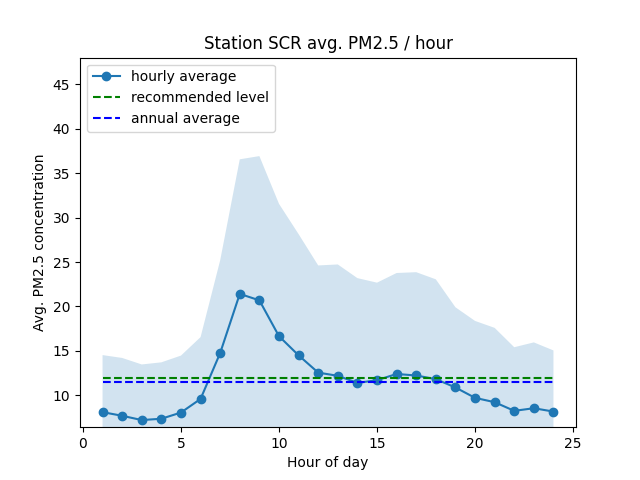
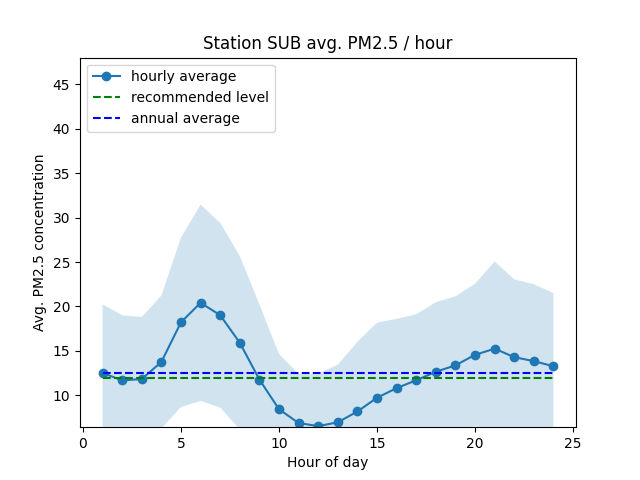
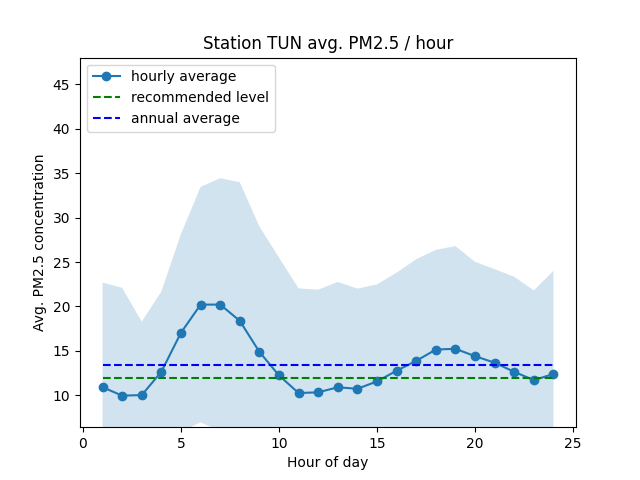
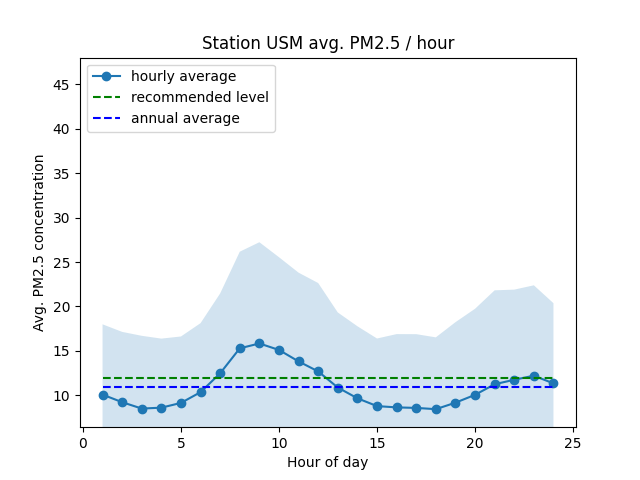
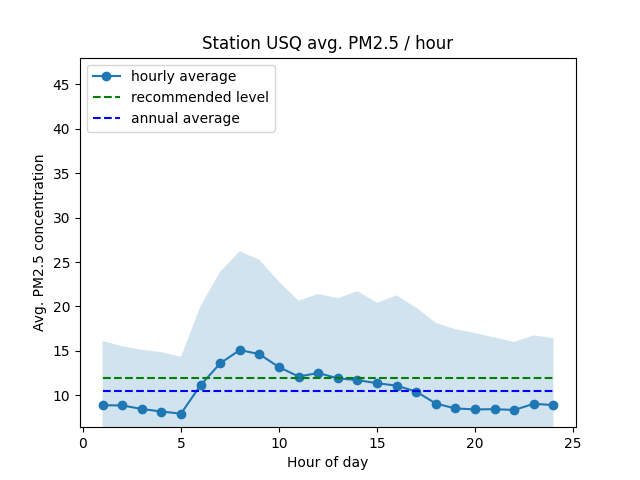

<Figure size 640x480 with 0 Axes>

In [12]:
stations_csv_path = '../data/raw/stations_loc.csv'
image_dir_path = '../reports/figures/img/tmp'

# add some extra features like latitude and longitude to the data for mapping
enriched_raw_data = visualize.add_extra_features(raw_data, stations_csv_path)

# choose a variable to calculate long-term averages for
x_variable = 'hour_of_day' # Options ['day_of_week', 'hour_of_day']
# choose a pollutant which you are interested in
y_variable = 'PM2.5' # Options ['PM2.5', 'PM10', 'NO', 'NO2', 'NOX', 'CO', 'OZONE']

# generate a map representation of the data
visualize.create_map_with_plots(enriched_raw_data, image_dir_path, x_variable, y_variable)